In [60]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 25, 6
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
ori=pd.read_csv('website_data_20190225.csv')
ori.drop(['STATE','DISTRICT','WLCODE','SITE_TYPE','TEH_NAME','LAT','LON','SITE_NAME','POMRB','POMKH','PREMON'],axis=1,inplace=True)
ori.replace(to_replace="'0",value=0,inplace=True)
ori.head()

,BLOCK_NAME,YEAR_OBS,MONSOON
0,Masuda,2018,0
1,Masuda,2018,0
2,Arain,2018,0
3,Arain,2018,0
4,Jawaja,2018,0


In [3]:
dataset=pd.DataFrame().reindex_like(ori)
dataset.dropna(inplace=True)

# j=0
# for i in range(0,ori.shape[0]):
#     if ori['STATE'][i]=='RJ':
#         dataset.loc[j] = ori.iloc[i]
#         j+=1
# dataset.drop(['STATE'],axis=1,inplace=True)

# j=0
# for i in range(0,ori.shape[0]):
#     if ori['DISTRICT'][i]=='Ajmer':
#         dataset.loc[j] = ori.iloc[i]
#         j+=1
# dataset.drop(['DISTRICT'],axis=1,inplace=True)

j=0
for i in range(0,ori.shape[0]):
    if ori['BLOCK_NAME'][i]=='Arain':
        dataset.loc[j] = ori.iloc[i]
        j+=1
dataset.drop(['BLOCK_NAME'],axis=1,inplace=True)

dataset.head()

,YEAR_OBS,MONSOON
0,2018.0,0
1,2018.0,0
2,2018.0,0
3,2018.0,0
4,2018.0,0


In [4]:
dataset['YEAR_OBS']=(dataset['YEAR_OBS']).apply(np.int64)
dataset.rename(columns={'MONSOON':'No. Of Active Wells'}, inplace=True)
dataset.head()

,YEAR_OBS,No. Of Active Wells
0,2018,0
1,2018,0
2,2018,0
3,2018,0
4,2018,0


In [5]:
dataset['YEAR_OBS']=pd.to_datetime(dataset['YEAR_OBS'],yearfirst=True,format='%Y',infer_datetime_format=True)
indexedDataset=dataset.groupby('YEAR_OBS').count()
indexedDataset

,No. Of Active Wells
YEAR_OBS,
1994-01-01,3
1995-01-01,3
1996-01-01,3
1997-01-01,3
1998-01-01,3
1999-01-01,3
2000-01-01,3
2001-01-01,3
2002-01-01,3


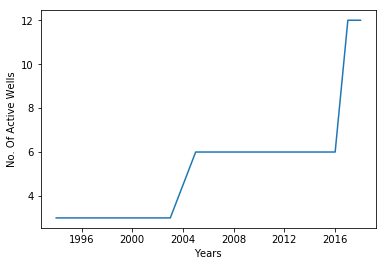

In [6]:
plt.xlabel('Years')
plt.ylabel('No. Of Active Wells')
plt.plot(indexedDataset)

In [7]:
from statsmodels.tsa.stattools import adfuller
def test_stationary(timeseries):
    
    #Determing rolling statistics
    moving_average=timeseries.rolling(window=2).mean()
    standard_deviation=timeseries.rolling(window=2).std()
    
    #Plot rolling statistics:
    plt.plot(timeseries,color='blue',label="Original")
    plt.plot(moving_average,color='red',label='Mean')
    plt.plot(standard_deviation,color='black',label='Standard Deviation')
    plt.legend(loc='best')  #best for axes
    plt.title('Rolling Mean & Deviation')
#     plt.show()
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results Of Dickey-Fuller Test')
    tstest=adfuller(timeseries['No. Of Active Wells'],autolag='AIC')
    tsoutput=pd.Series(tstest[0:4],index=['Test Statistcs','P-value','#Lags used',"#Obs. used"])
    #Test Statistics should be less than the Critical Value for Stationarity
    #lesser the p-value, greater the stationarity
    # print(list(dftest))
    for key,value in tstest[4].items():
        tsoutput['Critical Value (%s)'%key]=value
    print((tsoutput))

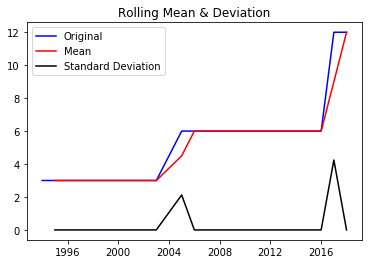

Results Of Dickey-Fuller Test
Test Statistcs           0.027711
P-value                  0.960765
#Lags used               0.000000
#Obs. used              23.000000
Critical Value (1%)     -3.752928
Critical Value (5%)     -2.998500
Critical Value (10%)    -2.638967
dtype: float64


In [8]:
test_stationary(indexedDataset)

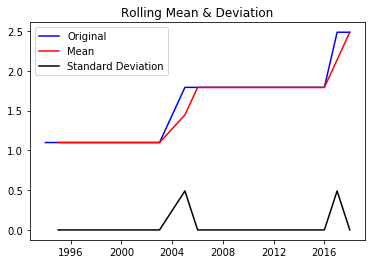

Results Of Dickey-Fuller Test
Test Statistcs          -0.270050
P-value                  0.929640
#Lags used               0.000000
#Obs. used              23.000000
Critical Value (1%)     -3.752928
Critical Value (5%)     -2.998500
Critical Value (10%)    -2.638967
dtype: float64


In [9]:
indexedDataset_logscale=np.log(indexedDataset)
test_stationary(indexedDataset_logscale)

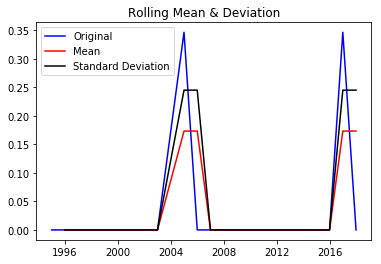

Results Of Dickey-Fuller Test
Test Statistcs          -4.944132
P-value                  0.000029
#Lags used               0.000000
#Obs. used              22.000000
Critical Value (1%)     -3.769733
Critical Value (5%)     -3.005426
Critical Value (10%)    -2.642501
dtype: float64


In [10]:
rolmeanlog=indexedDataset_logscale.rolling(window=2).mean()
dl_ma=indexedDataset_logscale-rolmeanlog
dl_ma.dropna(inplace=True)
test_stationary(dl_ma)

In [11]:
indexedDataset_logscale

,No. Of Active Wells
YEAR_OBS,
1994-01-01,1.098612
1995-01-01,1.098612
1996-01-01,1.098612
1997-01-01,1.098612
1998-01-01,1.098612
1999-01-01,1.098612
2000-01-01,1.098612
2001-01-01,1.098612
2002-01-01,1.098612


In [12]:
rolmeanlog

,No. Of Active Wells
YEAR_OBS,
1994-01-01,NaN
1995-01-01,1.098612
1996-01-01,1.098612
1997-01-01,1.098612
1998-01-01,1.098612
1999-01-01,1.098612
2000-01-01,1.098612
2001-01-01,1.098612
2002-01-01,1.098612


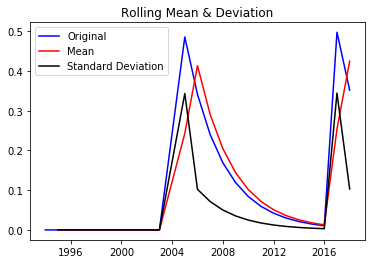

Results Of Dickey-Fuller Test
Test Statistcs          -2.000240
P-value                  0.286468
#Lags used               8.000000
#Obs. used              15.000000
Critical Value (1%)     -3.964443
Critical Value (5%)     -3.084908
Critical Value (10%)    -2.681814
dtype: float64


In [13]:
edwa=indexedDataset_logscale.ewm(halflife=2,min_periods=0,adjust=True).mean()
dlmeda=indexedDataset_logscale-edwa
test_stationary(dlmeda)

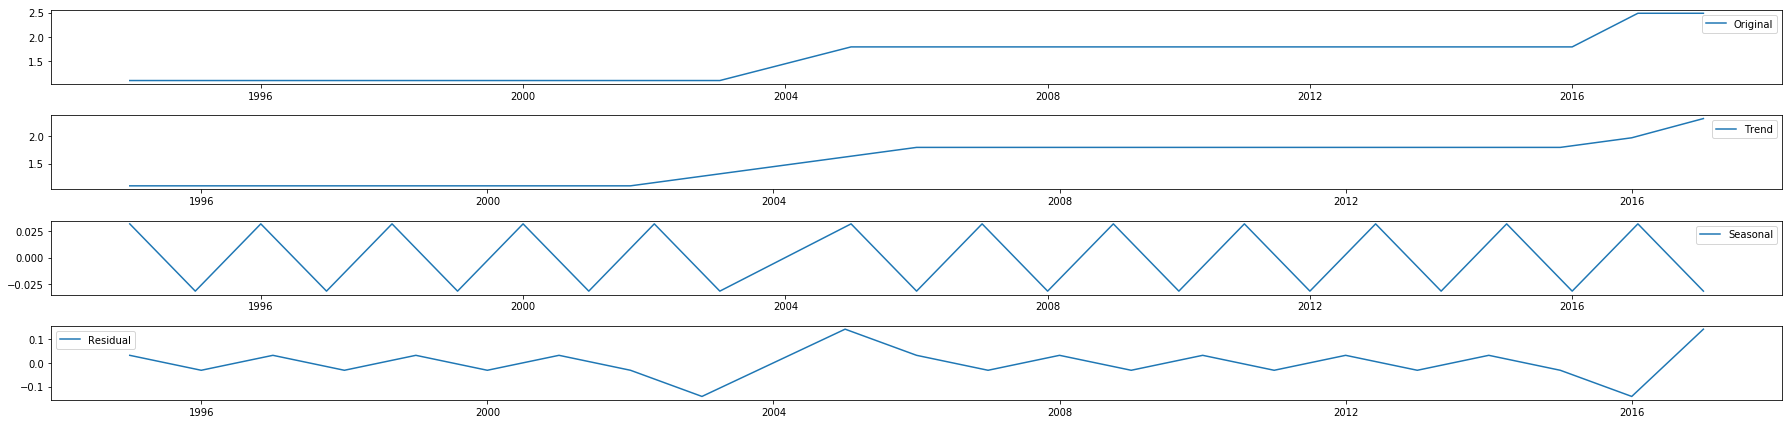

In [106]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompostion= seasonal_decompose(indexedDataset_logscale,freq=2)

trend=decompostion.trend
seasonal=decompostion.seasonal
residual=decompostion.resid

plt.subplot(411)
plt.plot(indexedDataset_logscale,label='Original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend,label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal,label='Seasonal')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual,label='Residual')
plt.legend(loc='best')

plt.tight_layout() #To Show Multiple Grpahs In One Output, Use lot.subplot(abc)

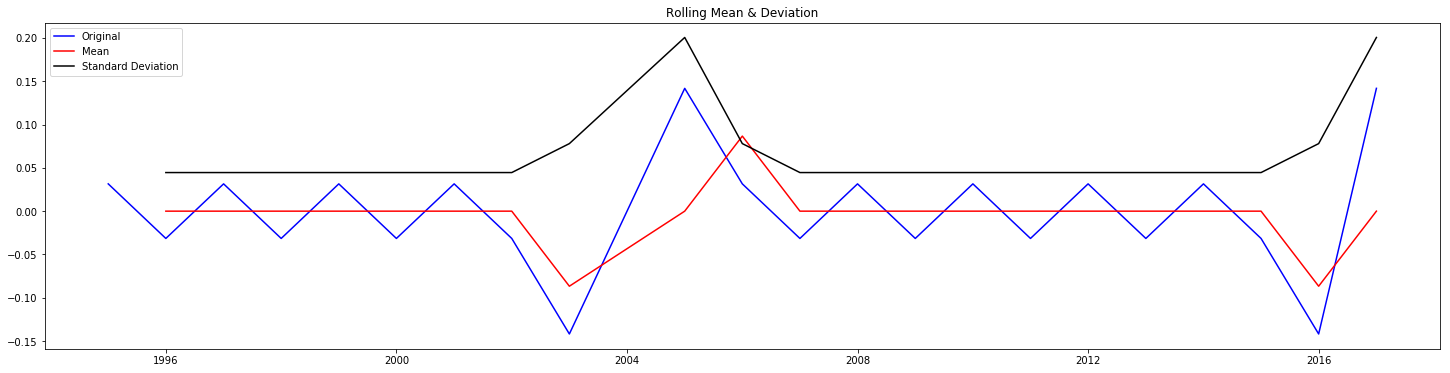

Results Of Dickey-Fuller Test
Test Statistcs          -1.890166
P-value                  0.336701
#Lags used               9.000000
#Obs. used              12.000000
Critical Value (1%)     -4.137829
Critical Value (5%)     -3.154972
Critical Value (10%)    -2.714477
dtype: float64


In [107]:
decomposedlogdata=residual
decomposedlogdata.dropna(inplace=True)
test_stationary(decomposedlogdata)

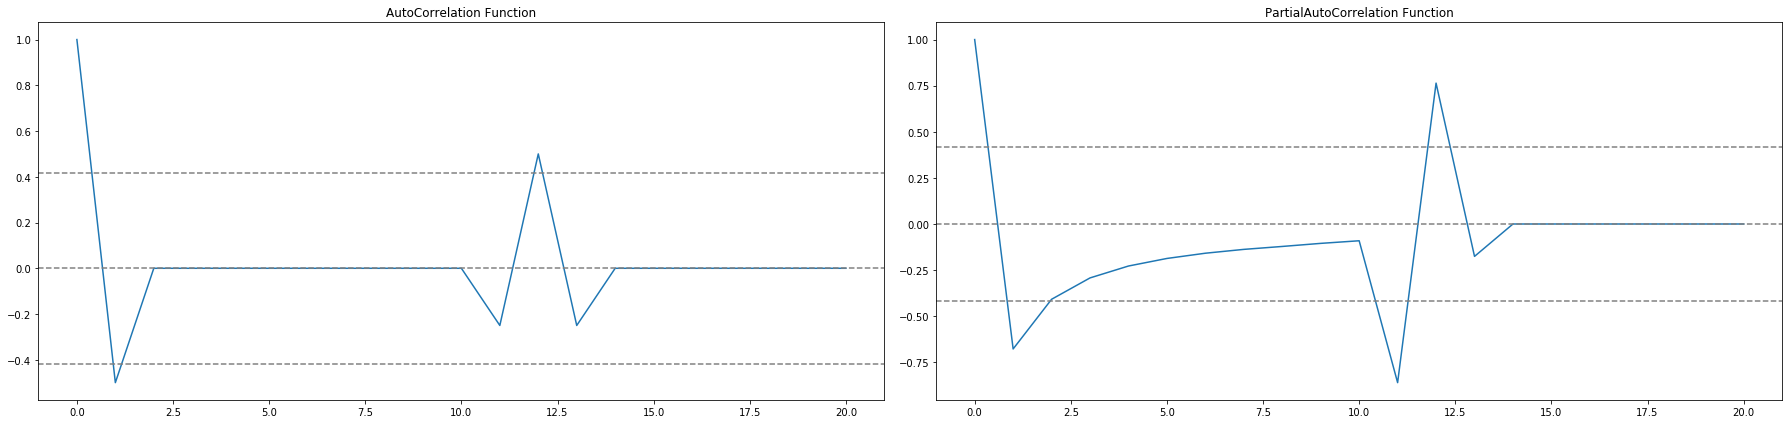

In [108]:
from statsmodels.tsa.stattools import acf,pacf
lag_acf=acf(dlds,nlags=20)
lag_pacf=pacf(dlds,nlags=20,method='ols')

plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(dlds)),linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(dlds)),linestyle='--',color='gray')
plt.title('AutoCorrelation Function')

plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(dlds)),linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(dlds)),linestyle='--',color='gray')
plt.title('PartialAutoCorrelation Function')

plt.tight_layout()

Plotting AR Model


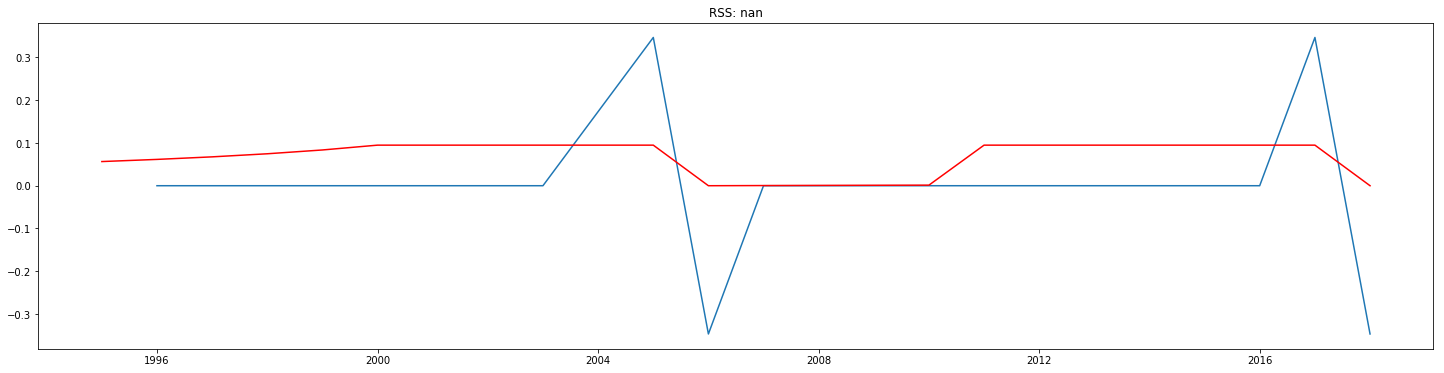

In [109]:
from statsmodels.tsa.arima_model import ARIMA

model=ARIMA(indexedDataset_logscale,order=(5,1,0))
results_AR=model.fit(disp=-1)
plt.plot(dlds)
plt.plot(results_AR.fittedvalues,color='red')
plt.title('RSS: %.4f'%sum((results_AR.fittedvalues-dlds['No. Of Active Wells'])**2))
print('Plotting AR Model')

Plotting MA Model


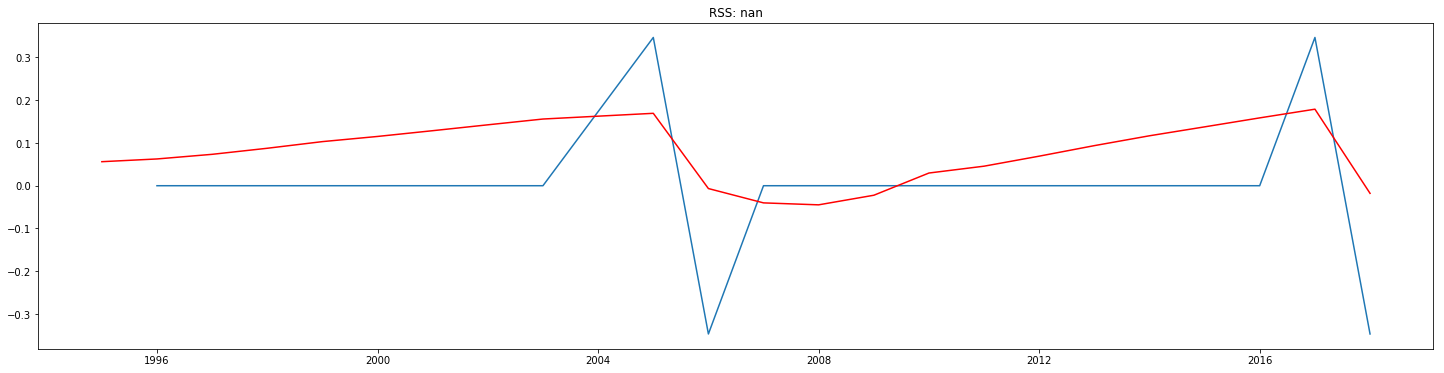

In [110]:
model = ARIMA(indexedDataset_logscale, order=(0, 1, 5))  #0,1,2
results_MA = model.fit(disp=-1)  
plt.plot(dlds)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'%sum((results_MA.fittedvalues-dlds['No. Of Active Wells'])**2))
print('Plotting MA Model')

Plotting Combined Model


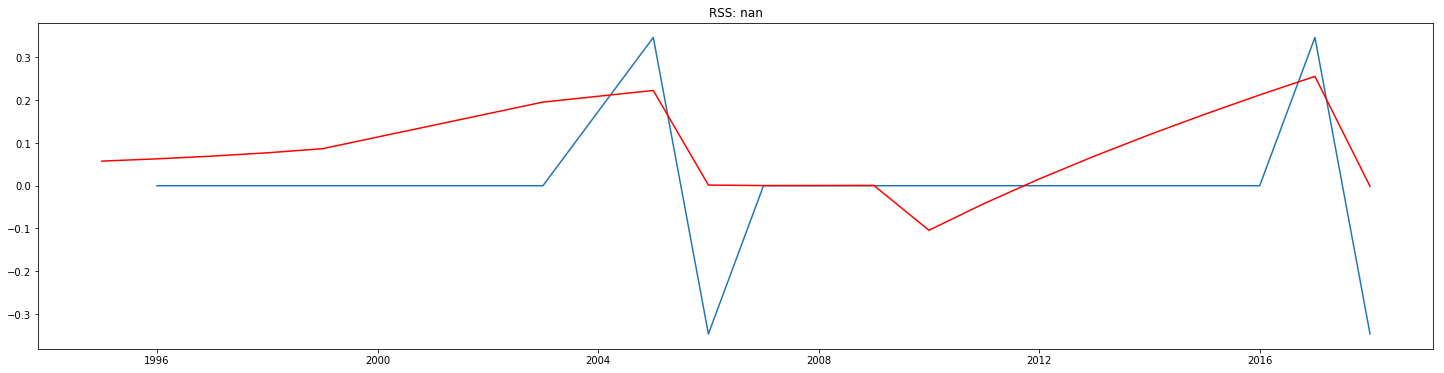

In [111]:
model = ARIMA(indexedDataset_logscale, order=(5, 1, 1))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(dlds)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'%sum((results_ARIMA.fittedvalues-dlds['No. Of Active Wells'])**2))
print('Plotting Combined Model')

In [112]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
predictions_ARIMA_diff.head()

YEAR_OBS
1995-01-01    0.057528
1996-01-01    0.062823
1997-01-01    0.069230
1998-01-01    0.076949
1999-01-01    0.086513
dtype: float64

In [113]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_diff_cumsum.head()

YEAR_OBS
1995-01-01    0.057528
1996-01-01    0.120351
1997-01-01    0.189581
1998-01-01    0.266530
1999-01-01    0.353044
dtype: float64

In [114]:
predictions_ARIMA_log = pd.Series(indexedDataset_logscale['No. Of Active Wells'].ix[0], index=indexedDataset_logscale.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

YEAR_OBS
1994-01-01    1.098612
1995-01-01    1.156140
1996-01-01    1.218963
1997-01-01    1.288193
1998-01-01    1.365142
dtype: float64

In [115]:
(predictions_ARIMA-indexedDataset['No. Of Active Wells'])

YEAR_OBS
1994-01-01         NaN
1995-01-01         NaN
1996-01-01         NaN
1997-01-01         NaN
1998-01-01         NaN
1999-01-01         NaN
2000-01-01         NaN
2001-01-01         NaN
2002-01-01         NaN
2003-01-01         NaN
2005-01-01         NaN
2006-01-01         NaN
2007-01-01         NaN
2008-01-01    3.926454
2009-01-01    3.933612
2010-01-01    2.951623
2011-01-01    2.585957
2012-01-01    2.721976
2013-01-01    3.346580
2014-01-01    4.531618
2015-01-01    6.444589
2016-01-01    9.386487
2017-01-01    7.867986
2018-01-01    7.840241
dtype: float64

Text(0.5, 1.0, 'RMSE: nan')

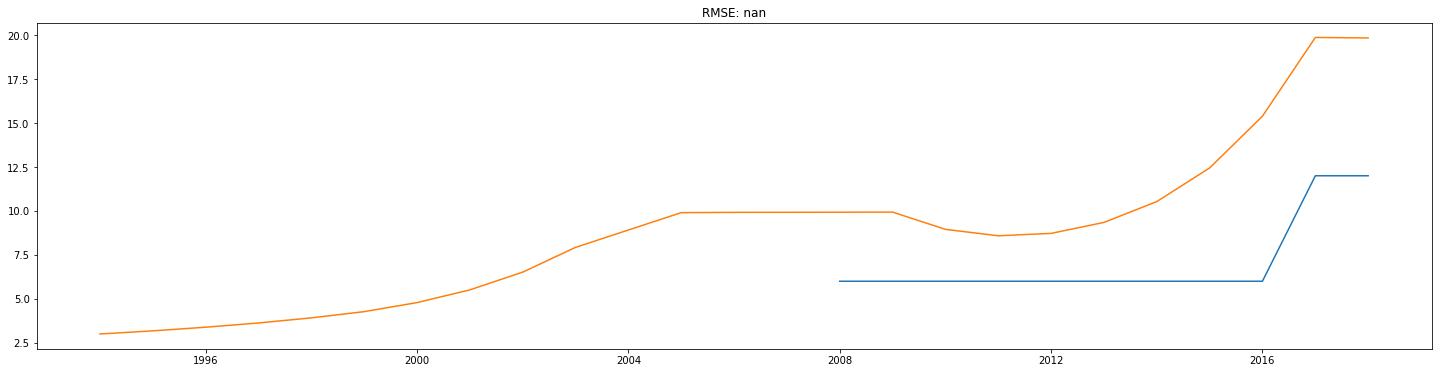

In [116]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(indexedDataset)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-indexedDataset['No. Of Active Wells'])**2)/len(indexedDataset)))

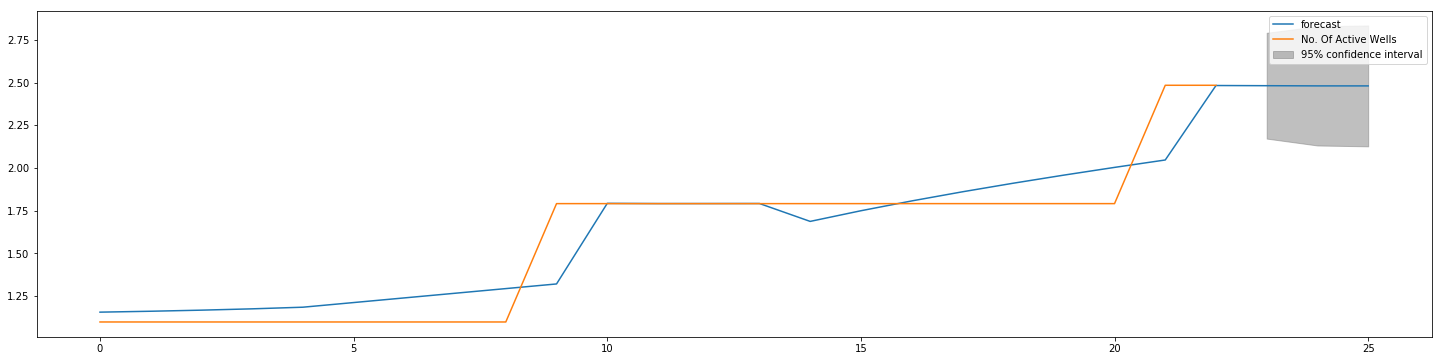

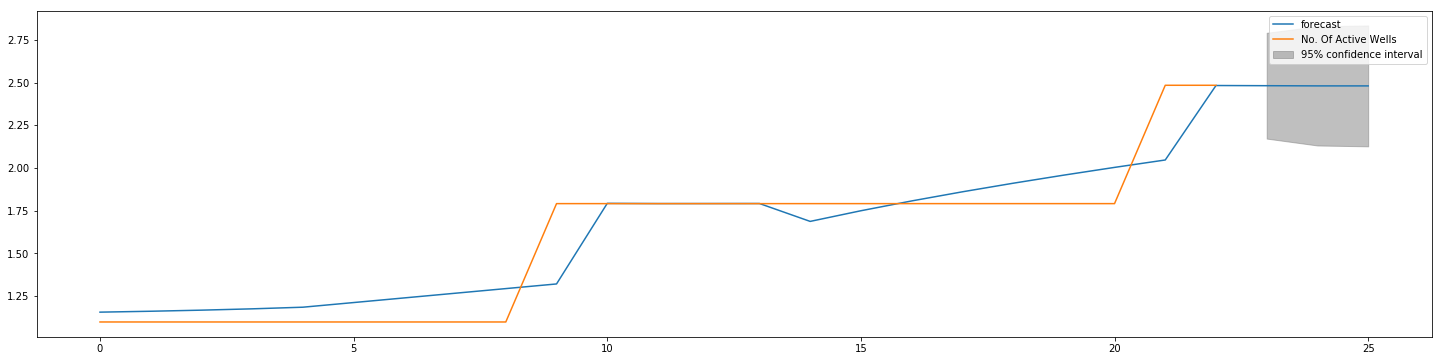

In [117]:
results_ARIMA.plot_predict(1,26)

In [118]:
x=results_ARIMA.forecast(steps=5)
print(x)

(array([2.48246015, 2.48135576, 2.48127133, 2.37675668, 2.37724781]), array([0.15804818, 0.17808935, 0.18059212, 0.18062414, 0.18207686]), array([[2.1726914 , 2.7922289 ],
       [2.13230704, 2.83040447],
       [2.12731728, 2.83522538],
       [2.02273987, 2.73077349],
       [2.02038373, 2.73411189]]))


In [119]:
np.exp(results_ARIMA.forecast(steps=5)[0])

array([11.97067791, 11.95746483, 11.95645534, 10.76991588, 10.77520659])